In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from evaluate_prf1 import evaluate_prf1

In [10]:

def prf1_sweep(pkl_paths, req_overlap=0.5, req_err_ang=3, req_err_dist=1.5):
    # req_err_ang = 3 #5.
    # req_err_dist = 1.5 #2.5
    # req_err_ang = 4
    # req_err_dist = 2.
    for i, pkl_path in enumerate(pkl_paths):
        pkl_file = open(pkl_path, 'rb')
        if i == 0:
            overlap_mat, err_ang_mat, err_dist_mat, num_assoc_mat = pickle.load(pkl_file)
            overlap_mat = np.reshape(overlap_mat, (-1,1))
            err_ang_mat = np.reshape(err_ang_mat, (-1,1))
            err_dist_mat = np.reshape(err_dist_mat, (-1,1))
            num_assoc_mat = np.reshape(num_assoc_mat, (-1,1))
        else:
            om, eam, edm, nam = pickle.load(pkl_file)
            overlap_mat = np.concatenate((overlap_mat, np.reshape(om, (-1,1))), axis=0)
            err_ang_mat = np.concatenate((err_ang_mat, np.reshape(eam, (-1,1))), axis=0)
            err_dist_mat = np.concatenate((err_dist_mat, np.reshape(edm, (-1,1))), axis=0)
            num_assoc_mat = np.concatenate((num_assoc_mat, np.reshape(nam, (-1,1))), axis=0)
            
    assoc_reqs = np.arange(3, 20)
    precisions = []
    recalls = []
    f1s = []
    for req_assoc in assoc_reqs:
        precision, recall, f1 = evaluate_prf1(overlap_mat, err_ang_mat, err_dist_mat, num_assoc_mat, req_err_ang=req_err_ang, req_err_dist=req_err_dist, req_overlap=req_overlap, req_assoc=req_assoc)
        if precision == 0 and recall == 0 and f1 == 0:
            precision = np.nan
            recall = np.nan
            f1 = np.nan
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)

    return precisions, recalls, f1s, assoc_reqs

In [11]:
# results_dir = "/home/masonbp/results/west_point_2023/segment_align/14_param_sweep/00"
results_dir = "/home/masonbp/results/west_point_2023/segment_align/20_paper"
sub_dirs = [
    "sparkal2_sparkal1_same",
    "acl_jackal2_sparkal2_same",
    "acl_jackal2_sparkal1_same",
    "sparkal2_sparkal1_opposite",
    "acl_jackal2_sparkal2_perpendicular",
    "acl_jackal2_sparkal1_perpendicular",
]
req_overlap = 0.25
methods = ["point2d", "point3d", "vol2d", "vol3d", "gravity", "volgrav", "prunevol2d", "prunevol3d", "prunegrav", "prunevolgrav", "distfeatpca"]
# methods = [k for k in range(30)]
line_styles = [':', '--', '-.']

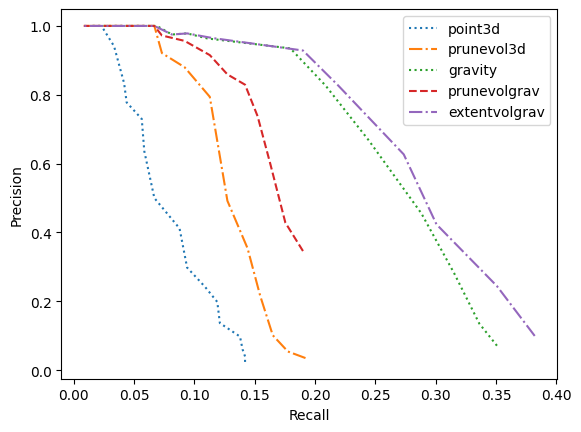

In [12]:
fig, ax = plt.subplots()
# methods = ["distfeatpca", "volgrav", "gravity", "prunevol3d", "prunegrav", "point3d", "distfeatpca2"]
# methods = ["point3d", "prunegrav", "prunevol3d", "gravity",  "volgrav", "oriented_bbox_grav", "pcavolgrav_1"]
# methods = ["point3d", "prunegrav", "prunevol3d", "gravity", "pcavolgrav_1", "prunevolgrav", "extentvolgrav_0", "extentvolgrav_1"]
methods = ["point3d", "prunegrav", "prunevol3d", "gravity", "prunevolgrav","extentvolgrav"]
# methods = ["point3d", "prunegrav", "prunevol3d", "gravity",  "pcavolgrav_2"]

req_err_ang = 3
req_err_dist = 1.5

for i, method in enumerate(methods):
    try:
        precisions, recalls, f1s, assoc_reqs = prf1_sweep([f"{results_dir}/{sub_dir}/{method}.pkl" for sub_dir in sub_dirs], req_overlap=req_overlap, req_err_ang=req_err_ang, req_err_dist=req_err_dist)
    except OSError as e:
        continue
    ax.plot(recalls, precisions, label=method, linestyle=line_styles[i % len(line_styles)])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend()
# plt.show()
# plt.savefig("/home/masonbp/figs/outdoor_global_loc_rss24/kmd_pr.pdf")
    